<a href="https://colab.research.google.com/github/MatthewMandhyan/Public/blob/main/Copy_of_HW6_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BADM 211 - HW 6: Logistic Regression (40 Points)

Before beginning, make sure to save a copy of this in your Google Drive, replace "Copy of" with "yournetid_", and enter your name and netid below.

**Name:** Matthew Mandhyan

**Netid:** mdm16

You will complete this notebook and submit this on Canvas. The HW is worth 40 points in total (**29 pts** of code and **11 pts** of Multiple Choice Questions). In each section, one code cell is given; you will likely have to create more.

# Section 1: Understanding the business problem

In this project, you have been approached by Sophia, the HR Director of a large manufacturing company, Beta Group. Beta Group is a multinational company with more than 200,000 employees. Sophia has performance data for around 85,000 employees. She needs your help in solving two problems for her business.

### Task 1: Assess impact of age and gender on promotion

The company is the industry leader in championing fairness in employee hiring and promotion policies. Sophia wants to ensure that promotion decision are fair. In particular, she wants to develop a model to assess whether age and gender have any impact on promotion for employees with similar experiences and skill sets.

Hence, your task is to fit a model to identify whether employees have different chances of getting promoted (*is_promoted*) based on *gender* and *age*.

### Task 2: Assess the value of an automated promotion system
The current promotion practice for the company is labor intensive, where the profile of each employee eligible for promotion is reviewed by a team of HR professionals in great detail. This costs an average of \$200 for each employee profile analyzed.

Sophia wants to reduce costs by automating the process using a predictive model.

Sophia is aware that an automated model may make some mistakes (incorrect predictions). She has calculated these costs in financial terms.

For one, the model may recommend an employee for promotion, who is not actually a good candidate for that. This will negatively affect the productivity of the firm, costing the firm \$500 on average.

On the other hand, if employees who deserve promotion are wrongly passed over, this will lower overall employee satisfaction and potentially resulting in losing that employee. This will cost the firm, on average, \$1,000.

Your task is to develop a model that can be used for promotion decisions.

To summarize, the value generated by the model can be assessed in the following way:

* Each prediction made by the model saves the company \$200

* Each incorrect promotion predicted by the model costs the company \$500

* Each incorrect denial of promotion by the model costs the company \$1,000

For example, for a test dataset of 1,000 employees, we make 1,000 predictions.  Out of those predictions, suppose the model makes 40 false promotions and 55 false denial predictions. Then, the value generated by the model is:

$\begin{align}
value\_generated &= 200 \cdot 1000  + (-500) \cdot 40 + (-1000) \cdot 55 \\
&= 200,000 - 20,000 - 55,000 \\
&= 125,000
\end{align}
$

#### <font color='blue'>Multiple Choice Questions</font>

**Q1.** Which of the following correctly describes the business problem?

1.  <font color=purple> Task 1 involves fitting an explanatory model while task 2 involves fitting a predictive model <font> - This

2.   Task 1 involves fitting a predictive model while task 2 involves fitting an explanatory model
3.   Both tasks involve fitting explanatory models
4.   Both tasks involve fitting predictive models

**Q2.** Which of the following is correct based on the information given in the business description section? (Note: The positive class indicates "promoted" and the negative class indicates that the promotion is "denied".)

1.   The cost of each false positive is 200
2.   <font color=purple> The cost of each false positive is 500 <font>

3.   The cost of each false positive is 1000
4.   Can't be determined based on the information provided

# Section 2: Understanding the data (8 Points in total)

### Step 1: Import the required packages

The following packages are required to perform the analysis.

In [93]:
!pip install --quiet dmba

In [94]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

import dmba
from dmba import classificationSummary

# we will need this to create an ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [95]:
%matplotlib inline

### Step 2: Read the data and perform data inspection (8 pts)

The dataset is saved at https://raw.githubusercontent.com/bahrini2002/LogisticRegression/refs/heads/main/LogisticRegression.csv

Perform the following tasks:
* Read the data and show the first 10 rows (0.5 pt)
* Display the variable names, position in the data, count of non-null values, and datatypes (0.5 pt)
* Drop the *employee_id* column from the dataframe. (1 pt)
* Show the distribution of the categorical variables in the dataframe (*department*, *gender*, *education*, and *recruitment_channel*). (You can show proportions, i.e., values between 0 and 1, or the actual number of observations, whatever you prefer.) (2 pts)
* In a single table, for each department, show the percentage of employees that are promoted and not promoted. (2 pts)
* In a single table, show the average values of all of the numerical variables for those employees that were promoted and those that were not. (2 pts)

In [96]:
# Your code here
df = pd.read_csv("https://raw.githubusercontent.com/bahrini2002/LogisticRegression/refs/heads/main/LogisticRegression.csv")

In [97]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_>80%,awards_won?,avg_training_score,is_promoted
0,A_1,Sales_and_Marketing,region_7,Master_and_above,f,sourcing,1,35,5,8,1,0,49,0
1,A_2,Operations,region_22,Bachelor,m,other,1,30,5,4,0,0,60,0
2,A_3,Sales_and_Marketing,region_19,Bachelor,m,sourcing,1,34,3,7,0,0,50,0
3,A_4,Sales_and_Marketing,region_23,Bachelor,m,other,2,39,1,10,0,0,50,0
4,A_5,Technology,region_26,Bachelor,m,other,1,45,3,2,0,0,73,0
5,A_6,Analytics,region_2,Bachelor,m,sourcing,2,31,3,7,0,0,85,0
6,A_7,Operations,region_20,Bachelor,f,other,1,31,3,5,0,0,59,0
7,A_8,Operations,region_34,Master_and_above,m,sourcing,1,33,3,6,0,0,63,0
8,A_9,Analytics,region_20,Bachelor,m,other,1,28,4,5,0,0,83,0
9,A_10,Sales_and_Marketing,region_1,Master_and_above,m,sourcing,1,32,5,5,1,0,54,0


In [98]:
df = df.drop(columns=['employee_id'])

In [99]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met_>80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [100]:
print(f"Department Distrubution \n{df["department"].value_counts(normalize=True)}")
print(f"Region Distrubution \n{df["region"].value_counts(normalize=True)}")
print(f"Education Distrubution \n{df["education"].value_counts(normalize=True)}")
print(f"Gender Distrubution \n{df["gender"].value_counts(normalize=True)}")
print(f"Recruitment Channel Distrubution \n{df["recruitment_channel"].value_counts(normalize=True)}")


Department Distrubution 
department
Sales_and_Marketing    0.276672
Operations             0.222268
Technology             0.145113
Procurement            0.143043
Analytics              0.098679
Finance                0.044620
HR                     0.038181
RandD                  0.016593
Legal                  0.014831
Name: proportion, dtype: float64
Region Distrubution 
region
region_2     0.217235
region_22    0.125671
region_7     0.098820
region_13    0.050777
region_15    0.050598
region_4     0.042141
region_26    0.036559
region_31    0.030466
region_27    0.028486
region_28    0.026762
region_23    0.025906
region_16    0.025075
region_11    0.021269
region_17    0.018420
region_25    0.017884
region_19    0.015086
region_14    0.014933
region_29    0.014665
region_20    0.013988
region_32    0.013183
region_30    0.012250
region_10    0.012135
region_1     0.011982
region_8     0.011944
region_5     0.011586
region_6     0.009721
region_12    0.007754
region_3     0.007537

In [101]:
print(f'Promotion Table Distrubition: \n{df["is_promoted"].value_counts(normalize=True)}')

Promotion Table Distrubition: 
is_promoted
0    0.567523
1    0.432477
Name: proportion, dtype: float64


In [102]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('is_promoted')

average_values_by_promotion = df.groupby('is_promoted')[numerical_cols].mean()

display(average_values_by_promotion)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_>80%,awards_won?,avg_training_score
is_promoted,,,,,,,
0,1.256662,35.641555,3.275907,6.330085,0.323962,0.014000,62.867989
1,1.202977,35.042297,3.984405,6.117202,0.697779,0.119093,71.322779


#### <font color='blue'>Multiple Choice Questions</font>

**Q3.** Which of the variables is the outcome variable?

1. *employee_id*
2. *department*
3. <font color=purple> *is_promoted* <font> - This

4. None of these

**Q4**. Which departments have the highest and lowest numbers of employees?

1. Highest: Sales & Marketing, Lowest: R&D

<font color=purple> 2. Highest: Sales & Marketing, Lowest: Legal </font> THIS

3. Highest: Sales & Marketing, Lowest: Operations
4. Highest: Operations, Lowest: Legal


**Q5**. Most of the employees are female.

1. True
2. <font color=purple> False </font> This


**Q6.** How many of the employees have bachelor's degrees or above? (Note, *Below_Secondary* means high school or less.) <font color=purple> 99.093% </font>


**Q7.** What percentage of employees are recruited through referral?

1. 0
2. <font color=purple> 2.5 </font> this
3. 42.4
4. 55.1


**Q8.** In which departments are less than a third of employees from those departments promoted?

1. Analytics
2. Finance
3. <font color=purple> HR </font> -THIS
1. <font color=purple> Legal </font> -THIS
1. Operations
1. Procurement
1. RandD
1. Sales_and_Marketing
1. Technology


In [103]:
df.groupby('department')['is_promoted'].value_counts(normalize=True)

department           is_promoted
Analytics            0              0.539159
                     1              0.460841
Finance              0              0.583166
                     1              0.416834
HR                   0              0.676146
                     1              0.323854
Legal                0              0.710594
                     1              0.289406
Operations           0              0.549885
                     1              0.450115
Procurement          0              0.534917
                     1              0.465083
RandD                0              0.642802
                     1              0.357198
Sales_and_Marketing  0              0.608477
                     1              0.391523
Technology           0              0.511268
                     1              0.488732
Name: proportion, dtype: float64

**Q9.** Which of the numerical variables are at least 10% higher for promoted employees than employees who were not promoted? (No need to show the calculations. You can estimate this based on the table.)

1. *no_of_trainings*
2. *age*
3. <font color=purple> *previous_year_rating* </font>
1. *length_of_service*
1. <font color=purple> *KPIs_met_>80%* </font>
1. <font color=purple> *awards_won?* </font>
1. <font color=purple> *avg_training_score* </font>


In [104]:
df1 = df.groupby('is_promoted')[['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met_>80%', 'awards_won?','avg_training_score']].mean()
df2 = df1[[col for col in df1.columns if col[1] > col[0]]]
print(df2)


             no_of_trainings        age  previous_year_rating  KPIs_met_>80%  \
is_promoted                                                                    
0                   1.256662  35.641555              3.275907       0.323962   
1                   1.202977  35.042297              3.984405       0.697779   

             awards_won?  avg_training_score  
is_promoted                                   
0               0.014000           62.867989  
1               0.119093           71.322779  


# Section 3: Preprocess the data (1 Point in total)

There are no missing values or duplicate rows in the dataset. Therefore, you just need to convert categorical variables to dummy variables. Note that *all* of the categorical variables need to be converted to dummies. (We will treat *education* as a nominal categorical variable.)

In [105]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met_>80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [106]:
# Your code here
df= pd.get_dummies(data=df, columns = ['department', 'region', 'education', 'gender','recruitment_channel'], drop_first=True).astype(int)

In [107]:
df.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met_>80%', 'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_RandD',
       'department_Sales_and_Marketing', 'department_Technology',
       'region_region_10', 'region_region_11', 'region_region_12',
       'region_region_13', 'region_region_14', 'region_region_15',
       'region_region_16', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_2', 'region_region_20',
       'region_region_21', 'region_region_22', 'region_region_23',
       'region_region_24', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_3', 'region_region_30', 'region_region_31',
       'region_region_32', 'region_region_33', 'region_region_34',
       'region_region_4', 'region_r

# Section 4: Explanatory Model (4 Points in total)


Fit an explanatory model and generate the summary. Then, analyze the output to assess whether gender and age impact the probability an employee is promoted.

In this model, you should include factors that could potentially affect the promotion decision: *education*, *gender*, *age*, *previous_year_rating*, *length_of_service*, and *avg_training_score*.

The outcome variable, *is_promoted*, is either 1 (Yes) or 0 (No).

In [108]:
# Your code here
formula = 'is_promoted ~ education_Below_Secondary +education_Master_and_above + gender_m + age + previous_year_rating + length_of_service + avg_training_score'
model = smf.logit(formula=formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.601411
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            is_promoted   No. Observations:                78284
Model:                          Logit   Df Residuals:                    78276
Method:                           MLE   Df Model:                            7
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                  0.1207
Time:                        21:59:57   Log-Likelihood:                -47081.
converged:                       True   LL-Null:                       -53546.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.4487      0.066    -67.051      0.000      

#### <font color='blue'>Multiple Choice Questions</font>
The following questions are about the explanatory model.

**Q10.** What is the effect of gender on promotion probability?

1. Gender does not affect the probability of promotion
2. Males have a higher probability of being promoted than females
3. <font color=purple> Females have a higher probability of being promoted than males </font>
4. There is not enough information to draw a conclusion

**Q11**. In the explanatory model, what is the interpretation of the coefficient of *age*?
1. <font color=purple> The probability of promotion decreases with age. </font>
2. The probability of promotion increases with age.
3. The probability of promotion remains constant with age.
4. There is not enough information to answer this.

**Q12**. In the explanatory model, what is the reference group for *education*?

1. <font color=purple> Bachelor </font>
2. Master_and_above
3. Below_Secondary
4. None

**Q13**. As employees' level of education increases, so does the likelihood of promotion.

1. <font color=purple> True </font>
2. False


**Q14**. As employees' length of service increases, so does the likelihood of promotion.

1. True
2. <font color=purple> False </font>
Can not conclude as p value is > .05, so it is not statistically significant


# Section 5: Predictive Model (16 Points in total)


## Step 1: Preprocess the data (2 pts)

Split the data into `X` and `y`. Then, using `train_test_split`, generate the training and test partitions. Allocate 20% of the data to the test state, and use `random_state=5`.

In [109]:
# Your code here
x = df.drop(columns = ['is_promoted'])
y = df["is_promoted"]

In [117]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=.2,random_state=5)

## Step 2: Model implementation (6 pts)
**Train the model** (2 pts)

Initialize and fit the logistic regression model using the training data.

Hint:
In order for this to work, you will need to add two new arguments to the function `LogisticRegression` when you initialize the model.:
* `max_iter = 2000`
* `random_state =1`
If you do not add these, you will likely receiving a warning that LGFS failed to converge! If the warning persists after adding these arguments, please ignore it.

Note, the model may take up to 2 minutes to run.


In [118]:
# Your code here
model = LogisticRegression(max_iter=2000, random_state=1)
model.fit(train_x, train_y)

LogisticRegression(max_iter=2000, random_state=1)

**Predict outcome classes** (2 pts)

 Predict the outcome class (0 or 1) for the training and test sets.

In [119]:
# Your code here
train_pred_class = model.predict(train_x)
test_pred_class  = model.predict(test_x)

**Predict outcome class probabilities** (2 pts)

Predict the probability of each outcome class for the training and test sets.

In [120]:
# Your code here
train_pred_prob = model.predict_proba(train_x)[:, 1]
test_pred_prob  = model.predict_proba(test_x)[:, 1]

## Model Evaluation  (8 pts)
**Classification summaries** (2 pts)

Print the classification summaries for the training and test datasets using the function `classificationSummary()`.

In [123]:
print("Training set:")
classificationSummary(train_y, train_pred_class)

print("\nTest set:")
classificationSummary(test_y, test_pred_class)

Training set:
Confusion Matrix (Accuracy 0.7825)

       Prediction
Actual     0     1
     0 28543  6981
     1  6639 20464

Test set:
Confusion Matrix (Accuracy 0.7822)

       Prediction
Actual    0    1
     0 7135 1769
     1 1641 5112


#### <font color='blue'>Multiple Choice Questions</font>

**Q15**. The predictive model makes accurate predictions for how many employees total in the test data? 12247


**Calculate metrics**

Calculate the sensitivity, specificity, and precision for the test set. (3 pts)


In [128]:
# Your code here
cm = confusion_matrix(test_y, test_pred_class)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision  = tp / (tp + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision: ", precision)

Sensitivity: 0.7569968902709907
Specificity: 0.8013252470799641
Precision:  0.7429152739427409



Calculate the value generated by the model if Sophia uses the model for making decisions on the **test** data. (1 pt)


In [129]:
# Your code here
n_test = tn + fp + fn + tp   # or len(test_y)

value_generated = 200 * n_test - 500 * fp - 1000 * fn
print("Value generated on test data: $", value_generated)

Value generated on test data: $ 605900


#### <font color='blue'>Multiple Choice Questions</font>
**Q16**. Enter the value you calculated above.


**ROC Curve** (2 pts)
Plot the ROC curve for your predictive model. Make sure to use the test data.

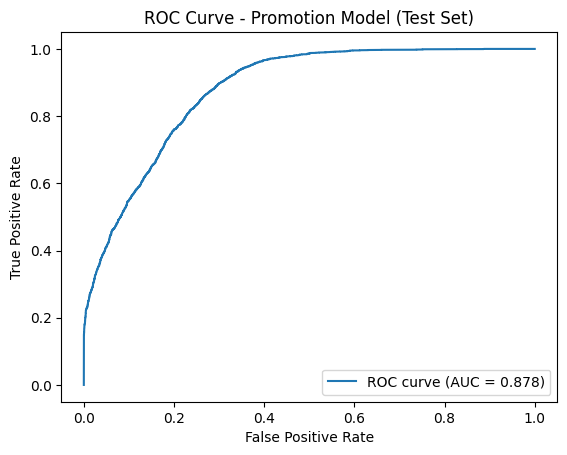

In [131]:
# Your code here
fpr, tpr, thresholds = metrics.roc_curve(test_y, test_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Promotion Model (Test Set)")
plt.legend()
plt.show()